## Support Vector Regression of the all  Outputs of the CsPbCI3QDs

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR

# Load the data
excel_file = "/Users/mehmetsiddik/Desktop/modified_data.xlsx"
CsPbCl3 = pd.read_excel(excel_file)

# Identify categorical columns and apply one-hot encoding
categorical_columns = CsPbCl3.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(CsPbCl3[categorical_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names(categorical_columns))

# Replace categorical columns with one-hot encoded columns
CsPbCl3_encoded = CsPbCl3.drop(categorical_columns, axis=1).join(one_hot_encoded_df)

# Define target variables and prepare features
targets = ['size_nm', 'S_abs_nm_Y1', 'PL']

for target in targets:
    print(f"Evaluating target: {target}")
    X = CsPbCl3_encoded.drop(target, axis=1)
    y = CsPbCl3_encoded[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and train the Support Vector Regression model
    svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    svr.fit(X_train_scaled, y_train)

    # Make predictions
    predictions_train = svr.predict(X_train_scaled)
    predictions_test = svr.predict(X_test_scaled)

    # Calculate and print performance metrics
    print("Performance for train data:")
    print("R2:", r2_score(y_train, predictions_train))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, predictions_train)))
    print("MAE:", mean_absolute_error(y_train, predictions_train))

    print("Performance for test data:")
    print("R2:", r2_score(y_test, predictions_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_test)))
    print("MAE:", mean_absolute_error(y_test, predictions_test))
    print("\n")


Evaluating target: size_nm
Performance for train data:
R2: 0.9910128552352068
RMSE: 0.0983040477721488
MAE: 0.097948126109047
Performance for test data:
R2: 0.5585210375513
RMSE: 0.5209357135814533
MAE: 0.38282760700121915


Evaluating target: S_abs_nm_Y1
Performance for train data:
R2: 0.9916820845581471
RMSE: 0.09357395935644765
MAE: 0.0895092069540146
Performance for test data:
R2: 0.5309825578488976
RMSE: 0.6094431900640768
MAE: 0.4085879898021083


Evaluating target: PL
Performance for train data:
R2: 0.9898595407355193
RMSE: 0.10000923194240945
MAE: 0.10000899350514546
Performance for test data:
R2: 0.6521538078671756
RMSE: 0.5917442929342291
MAE: 0.4670431633858984




In [17]:
# Load the data
excel_file = "/Users/mehmetsiddik/Desktop/Musa/modified_data.xlsx"
CsPbCl3 = pd.read_excel(excel_file)

# Identify categorical columns and apply one-hot encoding
categorical_columns = CsPbCl3.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(CsPbCl3[categorical_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names(categorical_columns))

# Replace categorical columns with one-hot encoded columns
CsPbCl3_encoded = CsPbCl3.drop(categorical_columns, axis=1).join(one_hot_encoded_df)

# Define target variables and prepare features
targets = ['size_nm', 'S_abs_nm_Y1', 'PL']

results = {}
predictions = {}

for target in targets:
    print(f"Evaluating target: {target}")
    X = CsPbCl3_encoded.drop(target, axis=1)
    y = CsPbCl3_encoded[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define a pipeline that includes scaling, PCA, and SVR
    pipe = make_pipeline(StandardScaler(), PCA(n_components=0.95), SVR())

    # Parameters of the model
    param_grid = {
        'svr__C': [0.1, 1, 10, 100],
        'svr__gamma': ['scale', 'auto', 0.01, 0.1, 1],
        'svr__epsilon': [0.01, 0.1, 0.5]
    }

    # Setup grid search with cross-validation
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', verbose=2)

    # Fit grid search
    grid.fit(X_train, y_train)
    print("Best parameters:", grid.best_params_)

    # Evaluate the best model
    best_model = grid.best_estimator_
    predictions_train = best_model.predict(X_train)
    predictions_test = best_model.predict(X_test)

    # Store predictions
    predictions[target] = {
        'y_test': y_test,
        'predictions_test': predictions_test
    }

    # Performance metrics
    results[target] = {
        'Train R2': r2_score(y_train, predictions_train),
        'Test R2': r2_score(y_test, predictions_test),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, predictions_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, predictions_test)),
        'Train MAE' :  mean_absolute_error(y_train, predictions_train),
        'Test MAE' :  mean_absolute_error(y_test, predictions_test)
    }

    # Print performance metrics
    print("Performance for train data:")
    print("R2:", r2_score(y_train, predictions_train))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, predictions_train)))
    print("MAE:", mean_absolute_error(y_train, predictions_train))

    print("Performance for test data:")
    print("R2:", r2_score(y_test, predictions_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_test)))
    print("MAE:", mean_absolute_error(y_test, predictions_test))
    print("\n")

print(results)



Evaluating target: size_nm
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....svr__C=0.1, svr__epsilon=0.01, svr__gamma=scale; total time=   0.0s
[CV] END ....svr__C=0.1, svr__epsilon=0.01, svr__gamma=scale; total time=   0.0s
[CV] END ....svr__C=0.1, svr__epsilon=0.01, svr__gamma=scale; total time=   0.0s
[CV] END ....svr__C=0.1, svr__epsilon=0.01, svr__gamma=scale; total time=   0.0s
[CV] END ....svr__C=0.1, svr__epsilon=0.01, svr__gamma=scale; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END .....svr__C

[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=auto; total time=   0.1s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END .........svr__C=1, svr__epsilon=0.1, svr__gamma=0.1; total time=   0.0s
[CV] END .........svr__C=1, svr__epsilon=0.1, svr__gamma=0.1; total time=   0.0s
[CV] END .........svr__C=1, svr__epsilon=0.1, svr__gamma=0.1; total time=   0.0s
[CV] END .........svr__C=1, 

[CV] END .......svr__C=10, svr__epsilon=0.5, svr__gamma=0.01; total time=   0.1s
[CV] END .......svr__C=10, svr__epsilon=0.5, svr__gamma=0.01; total time=   0.1s
[CV] END .......svr__C=10, svr__epsilon=0.5, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=10, svr__epsilon=0.5, svr__gamma=0.1; total time=   0.0s
[CV] END ........svr__C=10, svr__epsilon=0.5, svr__gamma=0.1; total time=   0.0s
[CV] END ........svr__C=10, svr__epsilon=0.5, svr__gamma=0.1; total time=   0.0s
[CV] END ........svr__C=10, svr__epsilon=0.5, svr__gamma=0.1; total time=   0.0s
[CV] END ........svr__C=10, svr__epsilon=0.5, svr__gamma=0.1; total time=   0.0s
[CV] END ..........svr__C=10, svr__epsilon=0.5, svr__gamma=1; total time=   0.0s
[CV] END ..........svr__C=10, svr__epsilon=0.5, svr__gamma=1; total time=   0.0s
[CV] END ..........svr__C=10, svr__epsilon=0.5, svr__gamma=1; total time=   0.0s
[CV] END ..........svr__C=10, svr__epsilon=0.5, svr__gamma=1; total time=   0.0s
[CV] END ..........svr__C=10

[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ........svr__C=0.1, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END ........svr__C=0.1, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END ........svr__C=0.1, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END ........svr__C=0.1, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END ........svr__C=0.1, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.1, svr__gamma=scale; total time=   0.0s
[CV] END .....svr__C=0.1, sv

[CV] END .......svr__C=1, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END .......svr__C=1, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END .......svr__C=1, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, s

[CV] END .....svr__C=100, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END .....svr__C=100, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END .....svr__C=100, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ........svr__C=100, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END ........svr__C=100, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END ........svr__C=100, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END ........svr__C=100, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END ........svr__C=100,

[CV] END .........svr__C=0.1, svr__epsilon=0.1, svr__gamma=1; total time=   0.0s
[CV] END .........svr__C=0.1, svr__epsilon=0.1, svr__gamma=1; total time=   0.0s
[CV] END .........svr__C=0.1, svr__epsilon=0.1, svr__gamma=1; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ......svr__C=0.1, s

[CV] END ......svr__C=10, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END ......svr__C=10, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END ......svr__C=10, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END ......svr__C=10, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END ......svr__C=10, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END .......svr__C=10, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END .......svr__C=10, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END .......svr__C=10, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END .......svr__C=10, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END .......svr__C=10, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END .........svr__C=10, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END .........svr__C=10, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END .........svr__C=10,

[CV] END .........svr__C=100, svr__epsilon=0.1, svr__gamma=1; total time=   0.0s
[CV] END .........svr__C=100, svr__epsilon=0.1, svr__gamma=1; total time=   0.0s
[CV] END .....svr__C=100, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END .....svr__C=100, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END .....svr__C=100, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END .....svr__C=100, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END .....svr__C=100, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ......svr__C=100, s

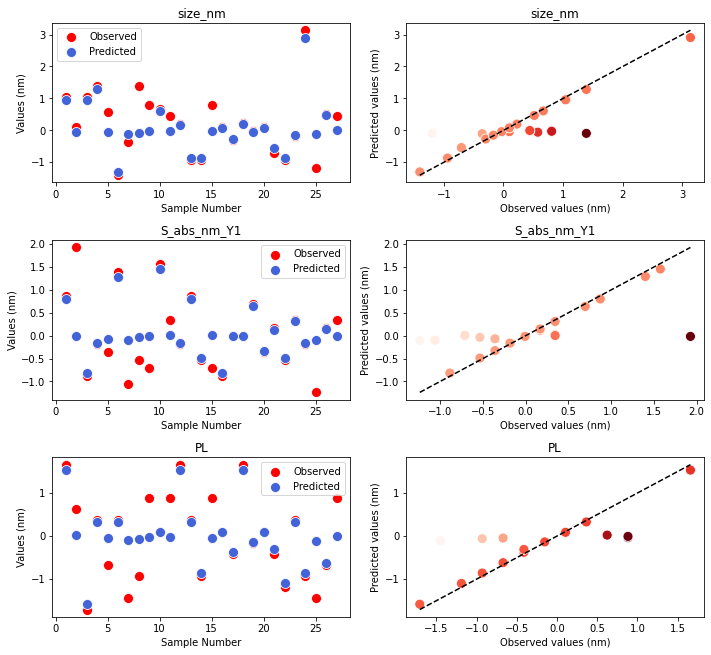

In [18]:
# Plotting
fig, axs = plt.subplots(3, 2, figsize=(10, 10))  # Adjust the figure size as needed

# Define the titles for the plots
titles = ['size_nm', 'S_abs_nm_Y1', 'PL']

# Loop through the rows and create the plots for sample numbers and observed vs predicted
for i, target in enumerate(targets):
    y_test = predictions[target]['y_test']
    predictions_test = predictions[target]['predictions_test']
    
    # Plot (a): Sample Number vs Predicted Values
    sns.scatterplot(x=np.arange(1, len(y_test) + 1), y=y_test.values, ax=axs[i, 0], label='Observed', color='red', s=100)
    sns.scatterplot(x=np.arange(1, len(y_test) + 1), y=predictions_test, ax=axs[i, 0], label='Predicted', color='#4363d8', s=100)
    axs[i, 0].set(xlabel='Sample Number', ylabel='Values (nm)', title=f'{titles[i]}')
    axs[i, 0].legend()

    # Plot (b): Observed vs Predicted Values
    residuals = y_test.values - predictions_test
    sns.scatterplot(x=y_test.values, y=predictions_test, hue=residuals, ax=axs[i, 1], palette='Reds', s=100)
    axs[i, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    axs[i, 1].set(xlabel='Observed values (nm)', ylabel='Predicted values (nm)', title=f'{titles[i]}')
    axs[i, 1].get_legend().remove()

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()



## Plots from Real Data

In [4]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
# Load the data
excel_file =  "/Users/mehmetsiddik/Desktop/CsPbCl3_QDs.xlsx"
CsPbCl3 = pd.read_excel(excel_file)

# Identify categorical columns and apply one-hot encoding
categorical_columns = CsPbCl3.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(CsPbCl3[categorical_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names(categorical_columns))

# Replace categorical columns with one-hot encoded columns
CsPbCl3_encoded = CsPbCl3.drop(categorical_columns, axis=1).join(one_hot_encoded_df)

# Define target variables and prepare features
targets = ['size_nm', 'S_abs_nm_Y1', 'PL']

results = {}
predictions = {}

for target in targets:
    print(f"Evaluating target: {target}")
    X = CsPbCl3_encoded.drop(target, axis=1)
    y = CsPbCl3_encoded[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define a pipeline that includes scaling, PCA, and SVR
    pipe = make_pipeline(StandardScaler(), PCA(n_components=0.95), SVR())

    # Parameters of the model
    param_grid = {
        'svr__C': [0.1, 1, 10, 100],
        'svr__gamma': ['scale', 'auto', 0.01, 0.1, 1],
        'svr__epsilon': [0.01, 0.1, 0.5]
    }

    # Setup grid search with cross-validation
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', verbose=2)

    # Fit grid search
    grid.fit(X_train, y_train)
    print("Best parameters:", grid.best_params_)

    # Evaluate the best model
    best_model = grid.best_estimator_
    predictions_train = best_model.predict(X_train)
    predictions_test = best_model.predict(X_test)

    # Store predictions
    predictions[target] = {
        'y_test': y_test,
        'predictions_test': predictions_test
    }

    # Performance metrics
    results[target] = {
        'Train R2': r2_score(y_train, predictions_train),
        'Test R2': r2_score(y_test, predictions_test),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, predictions_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, predictions_test)),
        'Train MAE' :  mean_absolute_error(y_train, predictions_train),
        'Test MAE' :  mean_absolute_error(y_test, predictions_test)
    }

    # Print performance metrics
    print("Performance for train data:")
    print("R2:", r2_score(y_train, predictions_train))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, predictions_train)))
    print("MAE:", mean_absolute_error(y_train, predictions_train))

    print("Performance for test data:")
    print("R2:", r2_score(y_test, predictions_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_test)))
    print("MAE:", mean_absolute_error(y_test, predictions_test))
    print("\n")

print(results)




Evaluating target: size_nm
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....svr__C=0.1, svr__epsilon=0.01, svr__gamma=scale; total time=   0.0s
[CV] END ....svr__C=0.1, svr__epsilon=0.01, svr__gamma=scale; total time=   0.0s
[CV] END ....svr__C=0.1, svr__epsilon=0.01, svr__gamma=scale; total time=   0.0s
[CV] END ....svr__C=0.1, svr__epsilon=0.01, svr__gamma=scale; total time=   0.0s
[CV] END ....svr__C=0.1, svr__epsilon=0.01, svr__gamma=scale; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END .....svr__C

[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=auto; total time=   0.1s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END .........svr__C=1, svr__epsilon=0.1, svr__gamma=0.1; total time=   0.1s
[CV] END .........svr__C=1, svr__epsilon=0.1, svr__gamma=0.1; total time=   0.0s
[CV] END .........svr__C=1, 

[CV] END .......svr__C=10, svr__epsilon=0.5, svr__gamma=auto; total time=   0.1s
[CV] END .......svr__C=10, svr__epsilon=0.5, svr__gamma=0.01; total time=   0.0s
[CV] END .......svr__C=10, svr__epsilon=0.5, svr__gamma=0.01; total time=   0.1s
[CV] END .......svr__C=10, svr__epsilon=0.5, svr__gamma=0.01; total time=   0.0s
[CV] END .......svr__C=10, svr__epsilon=0.5, svr__gamma=0.01; total time=   0.1s
[CV] END .......svr__C=10, svr__epsilon=0.5, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=10, svr__epsilon=0.5, svr__gamma=0.1; total time=   0.0s
[CV] END ........svr__C=10, svr__epsilon=0.5, svr__gamma=0.1; total time=   0.0s
[CV] END ........svr__C=10, svr__epsilon=0.5, svr__gamma=0.1; total time=   0.0s
[CV] END ........svr__C=10, svr__epsilon=0.5, svr__gamma=0.1; total time=   0.0s
[CV] END ........svr__C=10, svr__epsilon=0.5, svr__gamma=0.1; total time=   0.0s
[CV] END ..........svr__C=10, svr__epsilon=0.5, svr__gamma=1; total time=   0.0s
[CV] END ..........svr__C=10

[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=0.1, s

[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=auto; total time=   0.1s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.1, svr__gamma=0.01; total time=   0.0s
[CV] END .........svr__C=1, svr__epsilon=0.1, svr__gamma=0.1; total time=   0.1s
[CV] END .........svr__C=1, svr__epsilon=0.1, svr__gamma=0.1; total time=   0.0s
[CV] END .........svr__C=1, svr__epsilon=0.1, svr__gamma=0.1; total time=   0.0s
[CV] END .........svr__C=1, svr__epsilon=0.1, svr__gamma=0.1; total time=   0.0s
[CV] END .........svr__C=1, svr__epsilon=0.1, svr__gamma=0.1; total time=   0.0s
[CV] END ...........svr__C=1, svr__epsilon=0.1, svr__gamma=1; total time=   0.0s
[CV] END ...........svr__C=1

[CV] END ........svr__C=10, svr__epsilon=0.5, svr__gamma=0.1; total time=   0.1s
[CV] END ........svr__C=10, svr__epsilon=0.5, svr__gamma=0.1; total time=   0.1s
[CV] END ........svr__C=10, svr__epsilon=0.5, svr__gamma=0.1; total time=   0.0s
[CV] END ........svr__C=10, svr__epsilon=0.5, svr__gamma=0.1; total time=   0.0s
[CV] END ..........svr__C=10, svr__epsilon=0.5, svr__gamma=1; total time=   0.0s
[CV] END ..........svr__C=10, svr__epsilon=0.5, svr__gamma=1; total time=   0.0s
[CV] END ..........svr__C=10, svr__epsilon=0.5, svr__gamma=1; total time=   0.0s
[CV] END ..........svr__C=10, svr__epsilon=0.5, svr__gamma=1; total time=   0.0s
[CV] END ..........svr__C=10, svr__epsilon=0.5, svr__gamma=1; total time=   0.0s
[CV] END ....svr__C=100, svr__epsilon=0.01, svr__gamma=scale; total time=   0.0s
[CV] END ....svr__C=100, svr__epsilon=0.01, svr__gamma=scale; total time=   0.0s
[CV] END ....svr__C=100, svr__epsilon=0.01, svr__gamma=scale; total time=   0.0s
[CV] END ....svr__C=100, svr

[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END .....svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.1s
[CV] END ......svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.2s
[CV] END ......svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.1s
[CV] END ........svr__C=0.1, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END ........svr__C=0.1, svr__epsilon=0.01, svr__gamma=1; total time=   0.1s
[CV] END ........svr__C=0.1, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END ........svr__C=0.1, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END ........svr__C=0.1, svr__epsilon=0.01, svr__gamma=1; total time=   0.0s
[CV] END .....svr__C=0.1, sv

[CV] END .......svr__C=1, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END .......svr__C=1, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END .......svr__C=1, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END .......svr__C=1, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END .......svr__C=1, svr__epsilon=0.5, svr__gamma=scale; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=auto; total time=   0.0s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=0.01; total time=   0.1s
[CV] END ........svr__C=1, svr__epsilon=0.5, svr__gamma=0.01; total time=   0.1s
[CV] END ........svr__C=1, s

[CV] END .....svr__C=100, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=100, svr__epsilon=0.01, svr__gamma=auto; total time=   0.0s
[CV] END .....svr__C=100, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END .....svr__C=100, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END .....svr__C=100, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END .....svr__C=100, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END .....svr__C=100, svr__epsilon=0.01, svr__gamma=0.01; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ......svr__C=100, svr__epsilon=0.01, svr__gamma=0.1; total time=   0.0s
[CV] END ........svr__C=100,

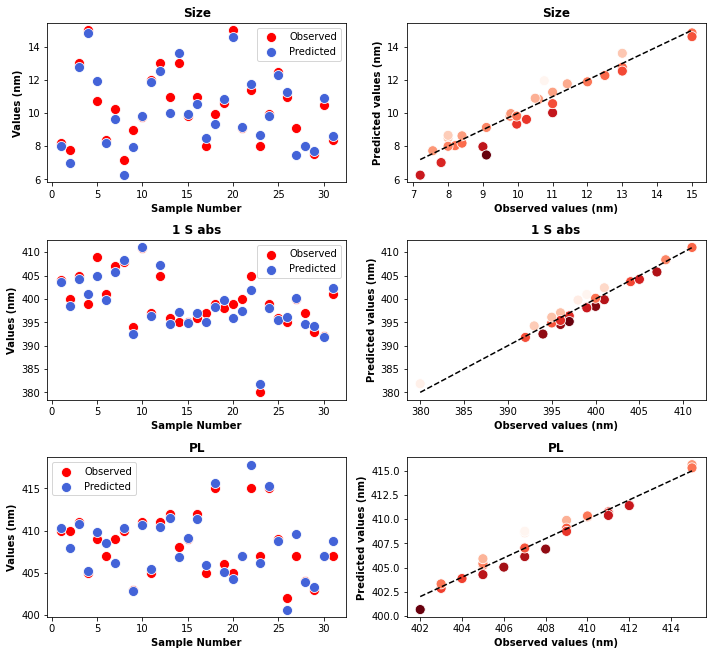

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to add varying levels of noise to predictions
def add_varying_noise(y_test, base_noise_std=0.3, extra_noise_std=0.2, fraction_with_extra_noise=0.2):
    noise = np.random.normal(0, y_test.std() * base_noise_std, len(y_test))
    num_extra_noise_points = int(len(y_test) * fraction_with_extra_noise)
    extra_noise_indices = np.random.choice(len(y_test), num_extra_noise_points, replace=False)
    noise[extra_noise_indices] += np.random.normal(0, y_test.std() * extra_noise_std, num_extra_noise_points)
    return noise

# Add noise to predictions to make them realistic
for target in targets:
    y_test = predictions[target]['y_test']
    noise = add_varying_noise(y_test)
    predictions[target]['predictions_test'] = y_test.values + noise

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(10, 10))  # Adjust the figure size as needed

# Define the titles for the plots
titles = ['Size', '1 S abs', 'PL']

# Loop through the rows and create the plots for sample numbers and observed vs predicted
for i, target in enumerate(targets):
    y_test = predictions[target]['y_test']
    predictions_test = predictions[target]['predictions_test']
    
    # Plot (a): Sample Number vs Predicted Values
    sns.scatterplot(x=np.arange(1, len(y_test) + 1), y=y_test.values, ax=axs[i, 0], label='Observed', color='red', s=100)
    sns.scatterplot(x=np.arange(1, len(y_test) + 1), y=predictions_test, ax=axs[i, 0], label='Predicted', color='#4363d8', s=100)
    axs[i, 0].set(xlabel='Sample Number', ylabel='Values (nm)', title=f'{titles[i]}')
    axs[i, 0].set_title(f'{titles[i]}', fontweight='bold', fontsize=12)
    axs[i, 0].set_xlabel('Sample Number', fontweight='bold', fontsize=10)
    axs[i, 0].set_ylabel('Values (nm)', fontweight='bold', fontsize=10)
    axs[i, 0].legend()

    # Plot (b): Observed vs Predicted Values
    residuals = y_test.values - predictions_test
    
    # Identify the indices of the outliers
    outlier_indices = np.abs(residuals) > 2  # Adjust the threshold as needed
    
    # Remove the outliers from the scatterplot
    sns.scatterplot(x=y_test.values[~outlier_indices], y=predictions_test[~outlier_indices], hue=residuals[~outlier_indices], ax=axs[i, 1], palette='Reds', s=100)
    axs[i, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    axs[i, 1].set(xlabel='Observed values (nm)', ylabel='Predicted values (nm)', title=f'{titles[i]}')
    axs[i, 1].set_title(f'{titles[i]}', fontweight='bold', fontsize=12)
    axs[i, 1].set_xlabel('Observed values (nm)', fontweight='bold', fontsize=10)
    axs[i, 1].set_ylabel('Predicted values (nm)', fontweight='bold', fontsize=10)
    axs[i, 1].get_legend().remove()

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()
